In [1]:
import glob
import numpy as np
import nibabel as niba

In [68]:
cd /data/mandelkowhc/Sleep/Proc06_3su/Su078/Se01/Ex08/

/gpfs/gsfs8/users/mandelkowhc/Sleep/Proc06_3su/Su078/Se01/Ex08


In [69]:
NiiFile = glob.glob('2*.nii')[0]
Ni = niba.load(NiiFile)


In [70]:
Ni.shape

(96, 72, 50, 1288)

In [78]:
%%time
Data = Ni.get_fdata()


CPU times: user 13 µs, sys: 7 µs, total: 20 µs
Wall time: 23.4 µs


In [79]:
N = 5
# Data = np.array_split(Data,Data.shape[-1]//10,axis=-1)
Data = Data[...,:Data.shape[-1]//N*N].reshape(*Data.shape[:3],-1,N)
# Data[...,:-Data.shape[-1]%10].shape

In [80]:
Data.shape

(96, 72, 50, 257, 5)

In [81]:
Data = np.var(Data,-1).sum((0,1,2))

209


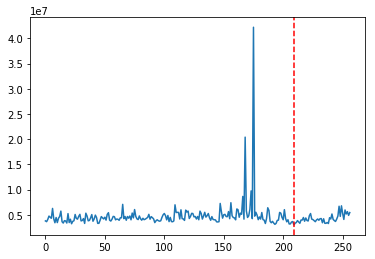

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Data)
plt.axvline(np.argmin(Data),c='r',ls='--')
print(np.argmin(Data))

In [ ]:
import sys
import numpy as np
import nibabel as niba

def hNiiMinVar(NiiFile,N):
    Ni = niba.load(NiiFile)
    Data = Ni.get_fdata()
    Data = Data[...,:Data.shape[-1]//N*N].reshape(*Data.shape[:3],-1,N)
    Data = np.var(Data,-1).sum((0,1,2))
    Data = np.argmin(Data)
    print(Data)
    
if __name__ == '__main__':
    hNiiMinVar(sys.argv[1], int(sys.argv[2]))
